In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics

In [2]:
x = [
    25, 34, 22, 27, 33, 33, 31, 22, 35, 34,
    67, 54, 57, 43, 50, 57, 59, 52, 65, 47,
    49, 48, 35, 33, 44, 45, 38, 43, 51, 46
]
y = [
    79, 51, 53, 78, 59, 74, 73, 57, 69, 75,
    51, 32, 40, 47, 53, 36, 35, 58, 59, 50,
    25, 20, 14, 12, 20, 5, 29, 27, 8, 7
]

data = {'x': x, 'y': y}
df = pd.DataFrame(data)

df

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


In [3]:
n_clusters = 3
kmeans = cluster.KMeans(n_clusters)
kmeans.fit(df)

KMeans(n_clusters=3)

In [4]:
centroids = kmeans.cluster_centers_  # 取出每一個 cluster 的中心點
print(centroids)

[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


In [5]:
cluster_labels = kmeans.labels_  # 取出每一個資料點隸屬的 cluster
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


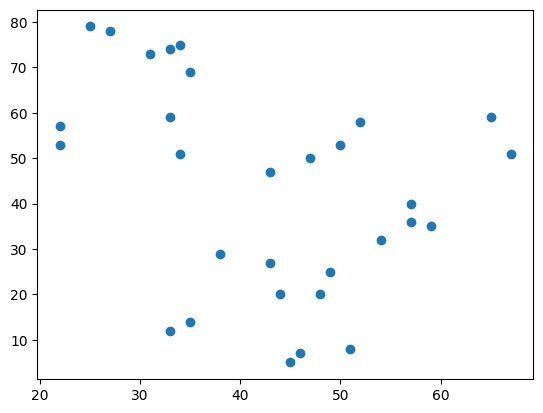

In [6]:
plt.scatter(df['x'], df['y'])

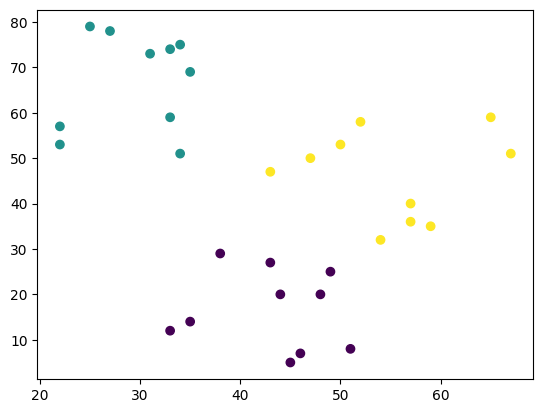

In [7]:
plt.scatter(df['x'], df['y'], c=cluster_labels)

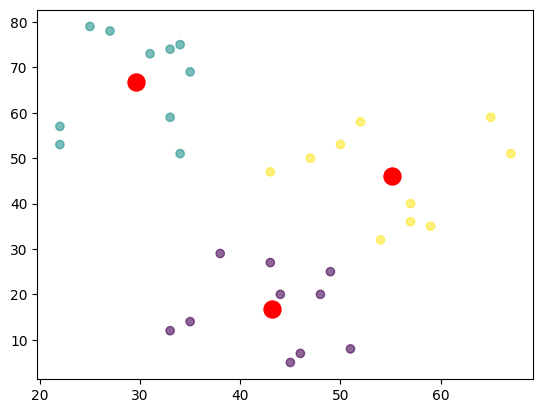

In [8]:
plt.scatter(df['x'], df['y'], c=cluster_labels, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150)

In [9]:
SSE = []
k = range(2, 11)

for x in k:
    kmeans_optimized = cluster.KMeans(x)
    kmeans_optimized.fit(df)
    SSE.append(kmeans_optimized.inertia_)

print(SSE)

[7425.392857142857, 3649.5, 2949.6825396825398, 1951.2023809523807, 1507.202380952381, 945.2166666666667, 856.8666666666668, 551.5, 437.3333333333333]


Text(0, 0.5, 'SSE value')

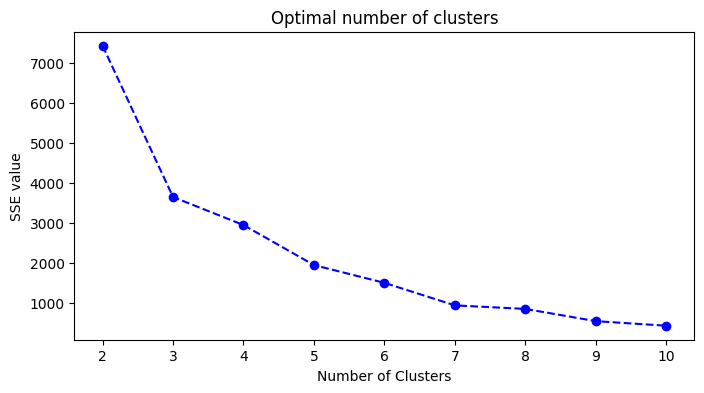

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(k, SSE, 'bo--')
plt.title('Optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE value')

In [ ]:
# 根據檢測的結果，資料集應分成 3 個 cluster。